In [1]:
import sklearn
from sklearn import manifold
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.extmath import safe_sparse_dot
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
matplotlib.__version__
np.__version__
sklearn.__version__

'0.23.2'

In [2]:
# data = [[0,548,289,576,586], [548,0,493,195,392], [289,493,0,427,776], [576,195,427,0,577], [586, 392, 776,577,0]]

In [22]:
#data = [[100, 0, 100, 0, 50, 50],[100, 0, 0, 100, 100, 0],[0, 100, 100, 0, 100, 0]]
data = [ \
    [10,18,18,52,2,0,0,0,0,100,16,16,36,16,16,0,0,98,0,2,44,14,14,14,14], \
    [10.0946,5.67,18,52.365,13.564,0,16.403,16.403,67.192,0,19.242,19.242,23.028,19.242,19.242,10.7255,10.725,62.776,6.624,9.148,33.438,15.457,17.034,17.034,17.034], \
    [67.329,11.363,11.363,0,9.943,66.76,11.079,11.079,5.39,5.681,14.77,14.77,40.909,14.772,14.772,19.034,19.034,36.079,9.94,15.909,32.67,14.48,17.61,17.61,17.61], \
    [0,0.49,0,98.039,1.470,0,25,25,1.960,48.039,17.156,17.156,31.372,17.15,17.51,21.56,21.078,0,39.705,17.64,30.39,14.7,18.137,18.627,18.13], \
    [17.746,22.4278,26.83,4.7,28.19,13.33,24.93,24.93,13.28,23.51,21.55,21.55,13.77,21.55,21.55,23.4,23.4,10.887,23.843,18.399,14.497,17.583,22.59,22.53,22.59]]
data_true = np.array(data)
data_true.shape

In [24]:
euclidean_distances(data_true)

array([[  0.        , 131.36267158, 157.53797337, 139.31068338,
        147.54915671],
       [131.36267158,   0.        , 125.62852619, 121.77139511,
        103.16795292],
       [157.53797337, 125.62852619,   0.        , 153.09457234,
         94.86863623],
       [139.31068338, 121.77139511, 153.09457234,   0.        ,
        113.70637518],
       [147.54915671, 103.16795292,  94.86863623, 113.70637518,
          0.        ]])

In [2]:
# https://www.dabblingbadger.com/blog/2020/2/27/implementing-euclidean-distance-matrix-calculations-from-scratch-in-python
# http://nonconditional.com/2014/04/on-the-trick-for-computing-the-squared-euclidian-distances-between-two-sets-of-vectors/
# In general, for any distance matrix between two matrices of size M x K and N x K, the size of the new matrix is M x N.
# distance_matrix_creating in scikit: https://github.com/scikit-learn/scikit-learn/blob/2beed5584/sklearn/manifold/_mds.py#L279
# it is automaticly created if the input matrix is not symmetric (hidden creation)
def distance_matrix(A, B, squared=False):
    """
    Compute all pairwise distances between vectors in A and B.

    Parameters
    ----------
    A : np.array
        shape should be (M, K)
    B : np.array
        shape should be (N, K)

    Returns
    -------
    D : np.array
        A matrix D of shape (M, N).  Each entry in D i,j represnets the
        distance between row i in A and row j in B.

    See also
    --------
    A more generalized version of the distance matrix is available from
    scipy (https://www.scipy.org) using scipy.spatial.distance_matrix,
    which also gives a choice for p-norm.
    """
    M = A.shape[0]
    N = B.shape[0]

    assert A.shape[1] == B.shape[1], f"The number of components for vectors in A \
        {A.shape[1]} does not match that of B {B.shape[1]}!"

    A_dots = (A*A).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    b_tmp = (B*B).sum(axis=1)
    # got rewritten to: (data_true*data_true).sum(axis=1).reshape((M,1)).dot(np.ones(shape=(1,M))).T
    # (is equivalent but easier to implement)
    B_dots = b_tmp*np.ones(shape=(M,1))
    D_squared =  A_dots + B_dots -2*A.dot(B.T)

    if squared == False:
        zero_mask = np.less(D_squared, 0.0)
        D_squared[zero_mask] = 0.0
        return np.sqrt(D_squared)

    return D_squared

In [26]:
distanceMatrix = distance_matrix(data_true, data_true)

In [27]:
def elementwise_multiplication(matrix0, matrix1):
    result = []
    for a in range(matrix0.shape[0]):
        vector = []
        for b in range(matrix0.shape[1]):
            vector.append(matrix0[a][b] * matrix1[a][b])
        result.append(vector)
    return result

In [28]:
def elementwise_multiplication_with_factor(matrix0, factor):
    result = []
    for a in range(matrix0.shape[0]):
        vector = []
        for b in range(matrix0.shape[1]):
            vector.append(matrix0[a][b] * factor)
        result.append(vector)
    return result

In [29]:
def rows_sum(matrix0):
    result = []
    for a in matrix0:
        acc = 0
        for b in a:
            acc += b
        result.append(acc)
    return result

In [30]:
def vectorToMatrixColumn(vector):
    result = []
    result.append(list(vector))
    return result

In [31]:
def ones_along_column(column):
    return 

In [32]:
def distance_matrix_custom(A,B):
    if(A[0].size != B[0].size):
        print("different number of vector elements.")
    M = A.shape[0] # A.length
    N = B.shape[0]
    A_dots = 

SyntaxError: invalid syntax (<ipython-input-32-e2fc465c1920>, line 6)

In [33]:
data_true

array([[ 10.    ,  18.    ,  18.    ,  52.    ,   2.    ,   0.    ,
          0.    ,   0.    ,   0.    , 100.    ,  16.    ,  16.    ,
         36.    ,  16.    ,  16.    ,   0.    ,   0.    ,  98.    ,
          0.    ,   2.    ,  44.    ,  14.    ,  14.    ,  14.    ,
         14.    ],
       [ 10.0946,   5.67  ,  18.    ,  52.365 ,  13.564 ,   0.    ,
         16.403 ,  16.403 ,  67.192 ,   0.    ,  19.242 ,  19.242 ,
         23.028 ,  19.242 ,  19.242 ,  10.7255,  10.725 ,  62.776 ,
          6.624 ,   9.148 ,  33.438 ,  15.457 ,  17.034 ,  17.034 ,
         17.034 ],
       [ 67.329 ,  11.363 ,  11.363 ,   0.    ,   9.943 ,  66.76  ,
         11.079 ,  11.079 ,   5.39  ,   5.681 ,  14.77  ,  14.77  ,
         40.909 ,  14.772 ,  14.772 ,  19.034 ,  19.034 ,  36.079 ,
          9.94  ,  15.909 ,  32.67  ,  14.48  ,  17.61  ,  17.61  ,
         17.61  ],
       [  0.    ,   0.49  ,   0.    ,  98.039 ,   1.47  ,   0.    ,
         25.    ,  25.    ,   1.96  ,  48.039 ,  17.156 ,  

In [34]:
embedding = manifold.MDS(n_components=2, \
                         metric=True, \
                         n_init=1, \
                         max_iter=1, \
                         eps=1e-12, \
                         n_jobs=None, \
                         random_state=0, \
                         dissimilarity="euclidean")
data_transformed = embedding.fit_transform(data_true)
data_transformed.shape

(5, 2)

In [35]:
embedding.dissimilarity_matrix_

array([[  0.        , 131.36267158, 157.53797337, 139.31068338,
        147.54915671],
       [131.36267158,   0.        , 125.62852619, 121.77139511,
        103.16795292],
       [157.53797337, 125.62852619,   0.        , 153.09457234,
         94.86863623],
       [139.31068338, 121.77139511, 153.09457234,   0.        ,
        113.70637518],
       [147.54915671, 103.16795292,  94.86863623, 113.70637518,
          0.        ]])

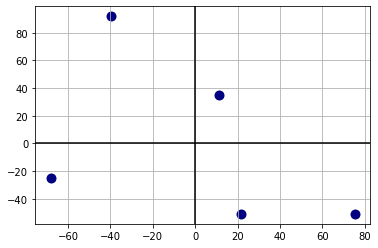

In [38]:
fig, ax = plt.subplots()
ax.scatter(data_transformed[:, 0], data_transformed[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [5]:
from __future__ import division

def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # print(B)
    
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
    print("\n", evals)
    print("\n", evecs)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
    print(evals)
    print(evecs)
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

In [7]:
np.set_printoptions(threshold=np.inf)
data = [ \
    [10,18,18,52,2,0,0,0,0,100,16,16,36,16,16,0,0,98,0,2,44,14,14,14,14], \
    [10.0946,5.67,18,52.365,13.564,0,16.403,16.403,67.192,0,19.242,19.242,23.028,19.242,19.242,10.7255,10.725,62.776,6.624,9.148,33.438,15.457,17.034,17.034,17.034], \
    [67.329,11.363,11.363,0,9.943,66.76,11.079,11.079,5.39,5.681,14.77,14.77,40.909,14.772,14.772,19.034,19.034,36.079,9.94,15.909,32.67,14.48,17.61,17.61,17.61], \
    [0,0.49,0,98.039,1.470,0,25,25,1.960,48.039,17.156,17.156,31.372,17.15,17.51,21.56,21.078,0,39.705,17.64,30.39,14.7,18.137,18.627,18.13], \
    [17.746,22.4278,26.83,4.7,28.19,13.33,24.93,24.93,13.28,23.51,21.55,21.55,13.77,21.55,21.55,23.4,23.4,10.887,23.843,18.399,14.497,17.583,22.59,22.53,22.59]]

data = [
    [0,548,289,576,586],
    [548,0,493,195,392],
    [289,493,0,427,776],
    [576,195,427,0,577],
    [586,392,776,577,0]
]
data

[[0, 548, 289, 576, 586],
 [548, 0, 493, 195, 392],
 [289, 493, 0, 427, 776],
 [576, 195, 427, 0, 577],
 [586, 392, 776, 577, 0]]

In [8]:
data_true = np.array(data)
D = distance_matrix(data_true, data_true)
data_scaled = cmdscale(D)[0]
data_scaled[:].tolist()


 [-8.88120827e-11  3.12766463e+04  5.53753251e+04  4.80230287e+05
  8.21296542e+05]

 [[ 0.4472136  -0.23130835 -0.5902466   0.43240117 -0.45949387]
 [ 0.4472136   0.6260342  -0.41942814 -0.36069287  0.31947124]
 [ 0.4472136   0.32389071  0.59647853 -0.08709331 -0.57595393]
 [ 0.4472136  -0.66871703  0.07518884 -0.57335237  0.13576164]
 [ 0.4472136  -0.04989952  0.33800737  0.58873738  0.58021492]]
[ 8.21296542e+05  4.80230287e+05  5.53753251e+04  3.12766463e+04
 -8.88120827e-11]
[[-0.45949387  0.43240117 -0.5902466  -0.23130835  0.4472136 ]
 [ 0.31947124 -0.36069287 -0.41942814  0.6260342   0.4472136 ]
 [-0.57595393 -0.08709331  0.59647853  0.32389071  0.4472136 ]
 [ 0.13576164 -0.57335237  0.07518884 -0.66871703  0.4472136 ]
 [ 0.58021492  0.58873738  0.33800737 -0.04989952  0.4472136 ]]


[[-416.41821915629083,
  299.64817226659295,
  -138.8966084774523,
  -40.907355884422394],
 [289.5221298207779,
  -249.95528567596986,
  -98.6996718365375,
  110.71542930434053],
 [-521.9606238880393,
  -60.354484976879434,
  140.36310287743584,
  57.28073501800305],
 [123.03454449413752,
  -397.3254536378739,
  17.69341012700496,
  -118.2639758787739],
 [525.8221687294146, 407.9870520241307, 79.53976730954972, -8.82483255914824]]

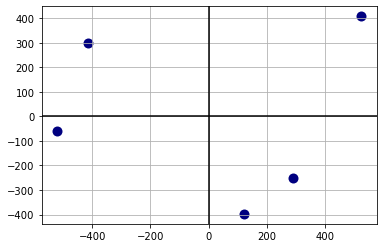

In [9]:
fig, ax = plt.subplots()
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [12]:
# example = np.array([
#   [ -81.13756442971577, 54.85927847163077 ],
#   [ -0.13319894509308583, -3.5784739312083627 ],
#   [ 71.75819515848391, 38.42978842966342 ],
#   [ -32.89552297826373, -73.00412341098304 ],
#   [ 42.40809119458864, -16.7064695591028 ]
# ])

example = np.array([
  [ -203.1860039259252, 269.5053346524564 ],
  [ 147.73595280226118, -148.06345119362106 ],
  [ -353.9964044368162, -32.03109020849445 ],
  [ 15.786110671884149, -265.94192158678277 ],
  [ 393.6603448885961, 176.5311283364418 ]
])
example

array([[-203.18600393,  269.50533465],
       [ 147.7359528 , -148.06345119],
       [-353.99640444,  -32.03109021],
       [  15.78611067, -265.94192159],
       [ 393.66034489,  176.53112834]])

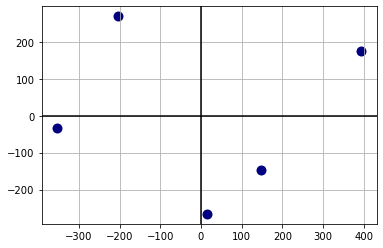

In [13]:
fig, ax = plt.subplots()
ax.scatter(example[:, 0], example[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [30]:
data0 = np.array([
  [ 81.1375644297158, 54.859278471630724 ],
  [ 0.13319894509306301, -3.578473931208297 ],
  [ -71.75819515848384, 38.42978842966346 ],
  [ 32.895522978263685, -73.00412341098308 ],
  [ -42.40809119458867, -16.706469559102775 ]
])
data0[:,0]

array([ 81.13756443,   0.13319895, -71.75819516,  32.89552298,
       -42.40809119])

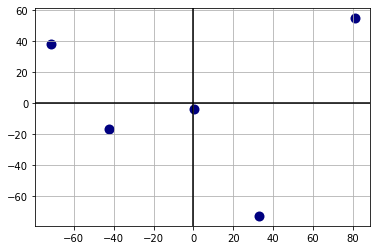

In [31]:
fig, ax = plt.subplots()
ax.scatter(data0[:,0], data0[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')